# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,734,88,40,55,114,53,7,132,53,18,139,142,249,158,87,0,7,176,183
1,405,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
2,507,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198
3,737,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
4,473,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196
5,19,101,56,100,215,69,10,208,32,24,169,227,651,223,74,6,5,186,193
6,75,101,53,103,203,63,9,195,34,22,162,210,571,210,68,5,5,191,198
7,631,103,49,107,179,54,12,208,32,24,159,214,644,183,66,1,12,191,200
8,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
9,87,86,37,60,115,54,5,119,56,17,132,141,209,129,72,2,8,186,190


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.473588,93.947177,45.198543,82.921676,170.664845,61.799636,8.477231,171.160291,40.406193,20.755920,148.415301,190.790528,452.790528,176.797814,72.679417,6.335155,12.539162,188.741348,195.316940
std,246.553472,8.387890,6.246657,16.094590,33.801328,7.929659,4.625573,34.057591,7.963239,2.664067,14.622957,32.116375,181.869373,32.928050,7.141119,4.854889,8.864389,6.013560,7.360981
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,87.000000,40.000000,70.000000,143.000000,57.000000,6.000000,148.000000,32.000000,19.000000,138.000000,168.000000,322.000000,151.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,429.000000,93.000000,45.000000,82.000000,171.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,181.000000,372.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,645.000000,100.000000,51.000000,98.000000,197.000000,65.000000,10.000000,203.000000,46.000000,23.000000,161.000000,219.000000,616.000000,201.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,58.000000,110.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

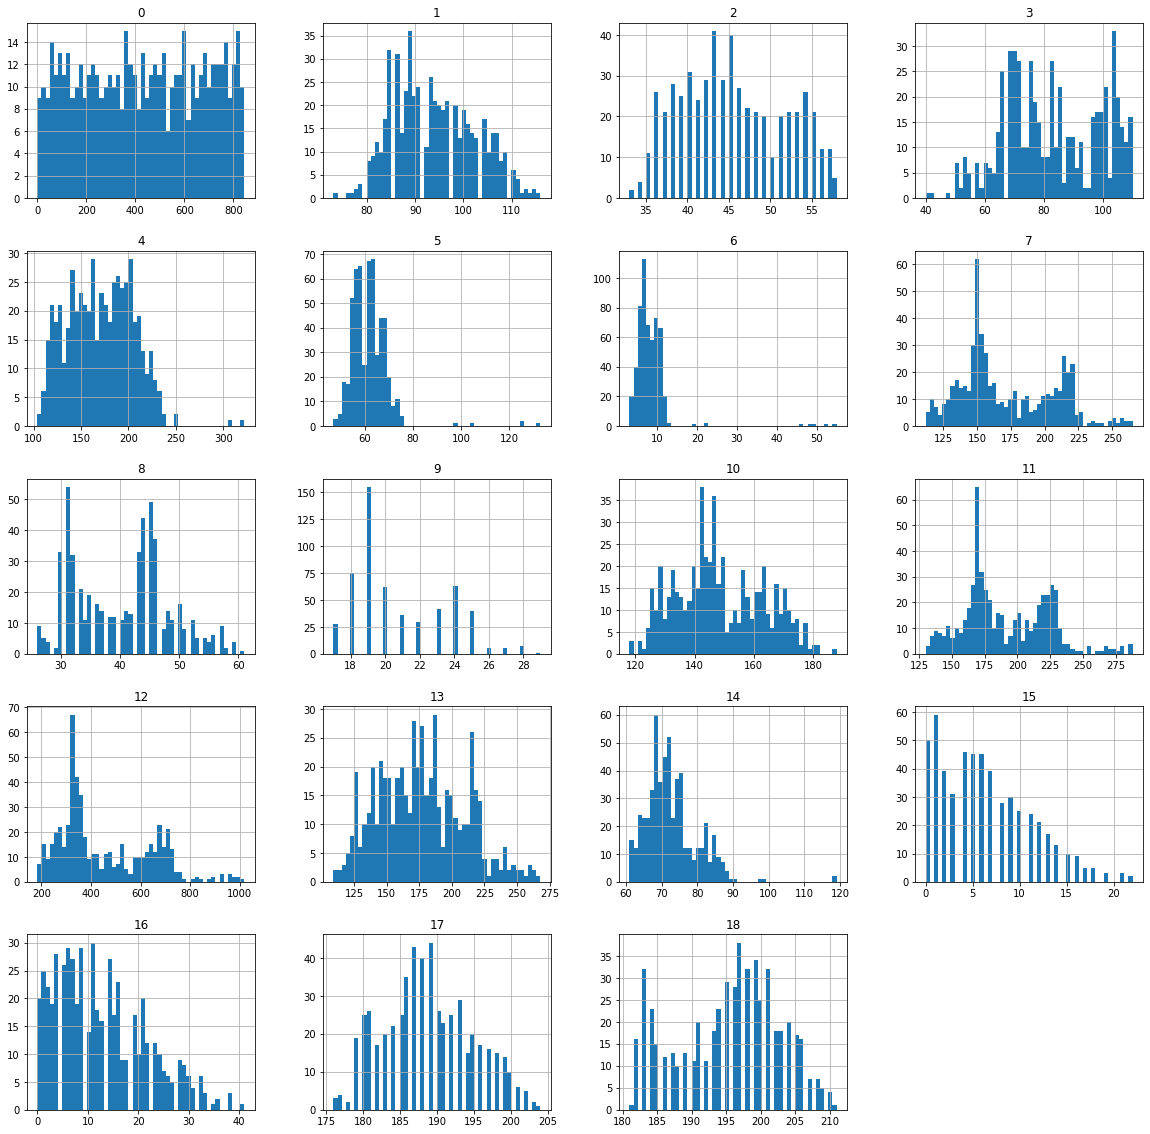

In [39]:
from matplotlib import pyplot as plt

X_train_pd.hist(bins=50, figsize=(20, 20))
plt.show()

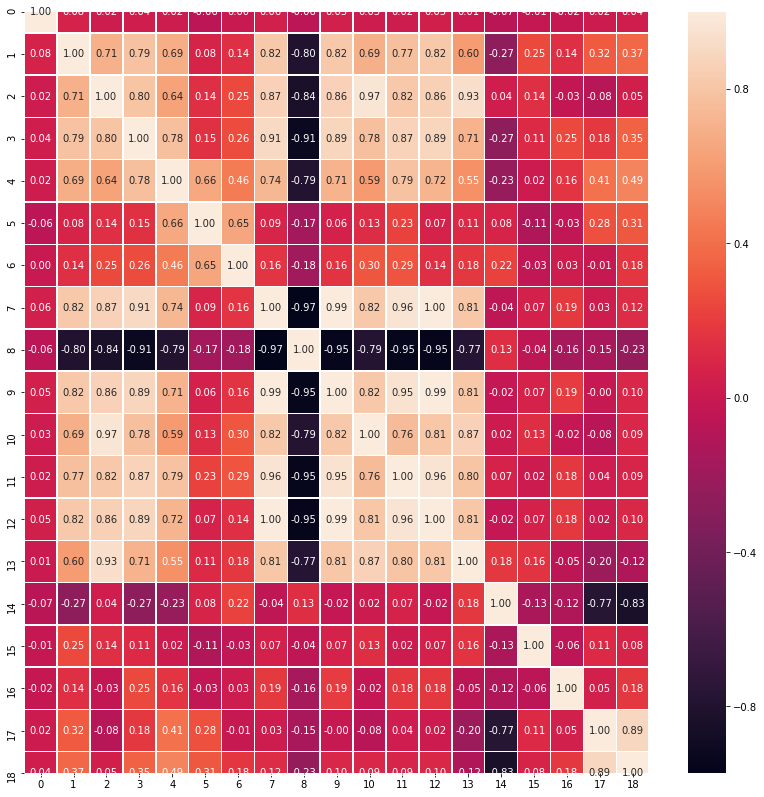

In [7]:
import seaborn as sns

plt.figure(figsize=(14, 14))
sns.heatmap(X_train_pd.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()

Features from 1 to 4, 7 and from 9 to 13 have strong positive correlation between themselves and feature 8 has strong negative correlation with previously mentioned features. Features 17 and 18 also have very strong positive correlation. It is probable some regurarization will be needed in order to use linear model.

- feature's distribution is not normal in majority of cases, there are some outliers, but not many
- I will not drop or replace outliers due to the small number of observations in the dataset and the fact that this values are not too different from the rest of distribution
- since data is in a little bit different scale i will normalize it by subtracting mean of a feature and deviding it by its standard deviation

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pd)
X_test_scaled = scaler.transform(pd.DataFrame(X_test))
print(X_train_scaled.shape, X_test_scaled.shape)

(549, 19) (297, 19)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
# search for regularization hyperparameter of logistic regression 
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')


C = [0.8, 1, 1.2]
penalty = ['l2', 'elasticnet']
parameters = dict(C=C, penalty=penalty)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
gridsearch = GridSearchCV(log_reg, parameters, scoring='f1', cv=5, n_jobs=-1)
gridsearch.fit(X_train_scaled, y_train)
print(gridsearch.best_params_)

{'C': 0.8, 'penalty': 'l2'}


In [43]:
# quick check if classes in train set are balanced
print(pd.Series(y_train).value_counts())

bus     142
van     138
opel    135
saab    134
dtype: int64


In [11]:
# f1 and accuracy scores for best estimator 
# since classes are balanced I use average='macro' in f1_score
# It calculates metrics for each label, and find their unweighted mean
def evaluate_metrics(estimator, X_train, X_test, train_labels, test_labels):
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    train_f1_score = f1_score(train_labels, train_preds, average='macro')
    test_f1_score = f1_score(test_labels, test_preds, average='macro')
    train_accuracy = accuracy_score(train_labels, train_preds)
    test_accuracy = accuracy_score(test_labels, test_preds)
    print(f'f1 and accuracy scores on train set: {train_f1_score, train_accuracy}')
    print(f'f1 and accuracy scores on test set: {test_f1_score, test_accuracy}')
    return train_preds, test_preds
    
    
_, _ = evaluate_metrics(gridsearch.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)    

f1 and accuracy scores on train set: (0.8081576171958524, 0.8087431693989071)
f1 and accuracy scores on test set: (0.7594496434937611, 0.7710437710437711)


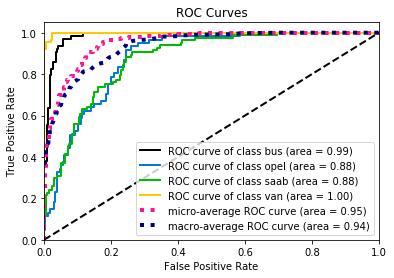

In [12]:
from scikitplot.metrics import plot_roc

log_reg_test_proba = gridsearch.best_estimator_.predict_proba(X_test_scaled)
plot_roc(y_test, log_reg_test_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

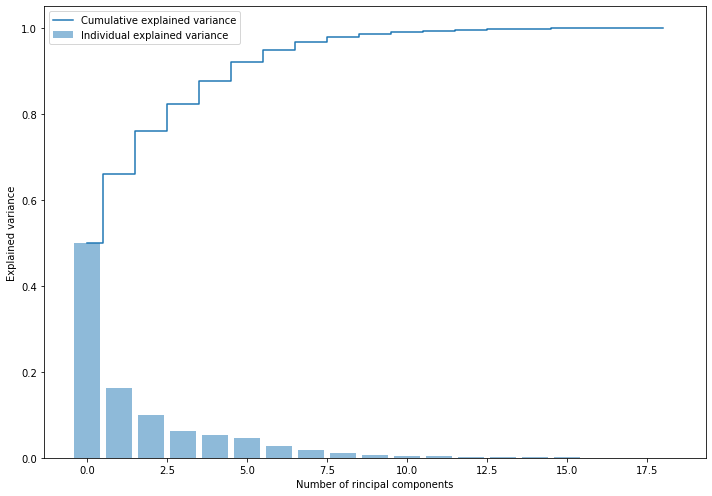

In [13]:
from sklearn.decomposition import PCA 
from matplotlib import pyplot as plt

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.figure(figsize=(10,7))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Number of rincipal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I chose 7 components because the explained variance with this number of components is above 90%. You should definitely normalize the data because it varies in different scale so it has different standard deviation, and a feature containing high numbers can have higher standard deviation than the rest of data just because of its scale. And the new axis that PCA finds are based on the standard deviation of the variables. So a variable with high standard deviation will have more impact for the calculation of axis than a variable with low standard deviation. When you normalize the data all variables have the same standard deviation.

In [14]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
# both metrics became worse with reducing number of features, even though we saved more than 90% of explained variance 

from sklearn.pipeline import Pipeline

pipe = Pipeline([('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])
parameters = {'clf__C': [0.8, 1, 1.2, 1.4], 'clf__penalty': ['l2', 'elasticnet']}

gscv = GridSearchCV(pipe, parameters, scoring='f1', cv=5, n_jobs=-1)
gscv.fit(X_train_pca, y_train)
print(gscv.best_params_)
_, _ = evaluate_metrics(gscv.best_estimator_, X_train_pca, X_test_pca, y_train, y_test)

{'clf__C': 0.8, 'clf__penalty': 'l2'}
f1 and accuracy scores on train set: (0.5934854497354497, 0.599271402550091)
f1 and accuracy scores on test set: (0.5917793576154897, 0.6195286195286195)


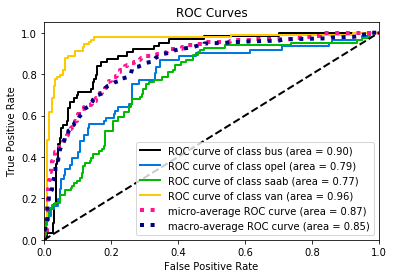

In [16]:
log_reg_test_proba_pca = gscv.best_estimator_.predict_proba(X_test_pca)
plot_roc(y_test, log_reg_test_proba_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('clf', DecisionTreeClassifier())])
parameters = {'clf__max_depth': range(5, 12)}

gscv = GridSearchCV(pipe, parameters, scoring='f1', cv=5, n_jobs=-1)
gscv.fit(X_train_pca, y_train)
print(gscv.best_params_)
_, _ = evaluate_metrics(gscv.best_estimator_, X_train_pca, X_test_pca, y_train, y_test)

{'clf__max_depth': 5}
f1 and accuracy scores on train set: (0.7047418046633935, 0.7067395264116576)
f1 and accuracy scores on test set: (0.6309152738389672, 0.6565656565656566)


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [18]:
from sklearn.ensemble import BaggingClassifier

def bagging_ensebmle(estimator, X_train, y_train, X_test, y_test):
    ensemble_train_f1_score = {}
    ensemble_test_f1_score = {}
    ensemble_train_accuracy = {}
    ensemble_test_accuracy = {}
        
    for i in range(2, 100, 5):
        bag_ensemble = BaggingClassifier(base_estimator=estimator,
                                          n_estimators=i,
                                          max_samples=X_train.shape[0],
                                          bootstrap = True,
                                          random_state=17,
                                          n_jobs=-1)
        bag_ensemble.fit(X_train, y_train)
        train_preds = bag_ensemble.predict(X_train)
        test_preds = bag_ensemble.predict(X_test)  
        
        ensemble_train_f1_score[i] = f1_score(y_train, train_preds, average='macro')
        ensemble_test_f1_score[i] = f1_score(y_test, test_preds, average='macro')
        ensemble_train_accuracy[i] = accuracy_score(y_train, train_preds)
        ensemble_test_accuracy[i] = accuracy_score(y_test, test_preds)
        
    return ensemble_train_f1_score, ensemble_test_f1_score, ensemble_train_accuracy, ensemble_test_accuracy

In [19]:
# for logistic regression ensebmle
estimator = LogisticRegression(C=0.8, penalty='l2', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

lr_ens_train_f1, lr_ens_test_f1, lr_ens_train_acc, lr_ens_test_acc = bagging_ensebmle(estimator, 
                                                                                      X_train_scaled, 
                                                                                      y_train, 
                                                                                      X_test_scaled, 
                                                                                      y_test)

In [20]:
# for decision tree ensebmle
estimator = DecisionTreeClassifier(max_depth=5, random_state=17)

dt_ens_train_f1, dt_ens_test_f1, dt_ens_train_acc, dt_ens_test_acc = bagging_ensebmle(estimator, 
                                                                                      X_train_scaled, 
                                                                                      y_train, 
                                                                                      X_test_scaled, 
                                                                                      y_test)

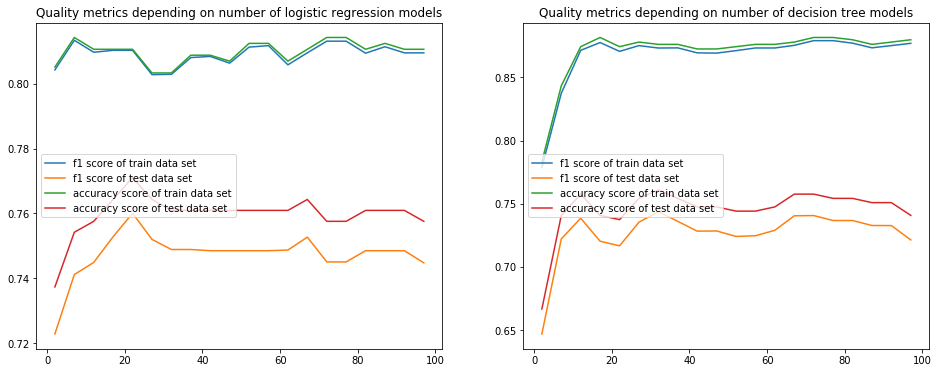

In [21]:
_, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(*zip(*lr_ens_train_f1.items()), label='f1 score of train data set')
axes[0].plot(*zip(*lr_ens_test_f1.items()), label='f1 score of test data set')
axes[0].plot(*zip(*lr_ens_train_acc.items()), label='accuracy score of train data set')
axes[0].plot(*zip(*lr_ens_test_acc.items()), label='accuracy score of test data set')
axes[0].legend(loc='center left')
axes[0].set_title('Quality metrics depending on number of logistic regression models')

axes[1].plot(*zip(*dt_ens_train_f1.items()), label='f1 score of train data set')
axes[1].plot(*zip(*dt_ens_test_f1.items()), label='f1 score of test data set')
axes[1].plot(*zip(*dt_ens_train_acc.items()), label='accuracy score of train data set')
axes[1].plot(*zip(*dt_ens_test_acc.items()), label='accuracy score of test data set')
axes[1].legend(loc='center left')
axes[1].set_title('Quality metrics depending on number of decision tree models')

plt.show()

- both ensembles test scores are noticeably worse than train scores
- train scores of ensembles of decision trees are higher than those for ensembles of logistic regressions, test scores are alike
- number of estimators used does not necessarily leads to improvment of quality metrics: 
 * for ensembles of logistic regressions the best quality on train set had ensemble of 7 estimators for these parameters
 * as to ensemble of decision trees - the best quality on train set had ensemble of 72 estimators for these parameters, but to be fair, after a certain small number of estimators quality does not change dramatically.
- to the question of optimality of the of decision tree hyperparameter I found (max_depth), I would choose a higher number for making an ensemble of decision trees. An individual tree would be overfitted but decision boundary of an ensemble of overfitted trees could be more complex and it may lead to improvment of quality. 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_train_f1_score = {}
rf_test_f1_score = {}
rf_train_accuracy = {}
rf_test_accuracy = {}
    
for i in range(2, 100, 5):
    rf = RandomForestClassifier(max_depth=5, random_state=17, n_estimators = i, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)
    train_preds = rf.predict(X_train_scaled)
    test_preds = rf.predict(X_test_scaled)
    rf_train_f1_score[i] = f1_score(y_train, train_preds, average='macro')
    rf_test_f1_score[i] = f1_score(y_test, test_preds, average='macro')
    rf_train_accuracy[i] = accuracy_score(y_train, train_preds)
    rf_test_accuracy[i] = accuracy_score(y_test, test_preds)

Text(0.5, 1.0, 'Quality metrics depending on number of decision trees')

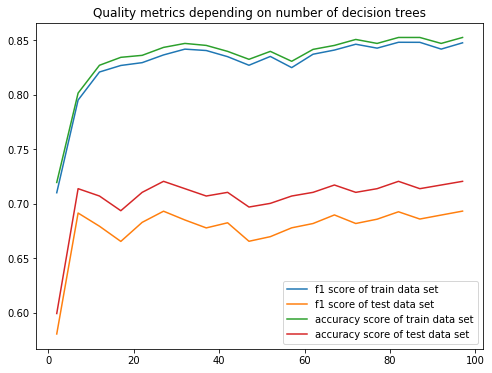

In [23]:
plt.figure(figsize=(8, 6))

plt.plot(*zip(*rf_train_f1_score.items()), label='f1 score of train data set')
plt.plot(*zip(*rf_test_f1_score.items()), label='f1 score of test data set')
plt.plot(*zip(*rf_train_accuracy.items()), label='accuracy score of train data set')
plt.plot(*zip(*rf_test_accuracy.items()), label='accuracy score of test data set')
plt.legend(loc='lower right')
plt.title('Quality metrics depending on number of decision trees')

The best number of estimators based on quality metrics of train set is 82 and the quality is still not as high as the quality of bagging ensemble of decision trees. I think it is due to the very small depth of an individual tree which I chose for single Decision Tree model. It was important to prevent overfitting there but Random Forest works with overfitted trees. In Random Forest decision trees not only fitted on different samples of observation but also on different subsamples of features, so it would be enesemble of very different overfitted trees. 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [24]:
def partial_learning(indices, model, X_train_scaled, y_train, X_test_scaled, y_test, quality_dict_f1, quality_dict_acc):
    for ind in indices:
        X_train_partial = X_train_scaled[:ind]
        y_train_partial = y_train[:ind]
        model.fit(X_train_partial, y_train_partial)
        preds = model.predict(X_test_scaled)
        f1 = f1_score(y_test, preds, average='macro')
        accuracy = accuracy_score(y_test, preds)
        quality_dict_f1[ind] = f1
        quality_dict_acc[ind] = accuracy
    return quality_dict_f1, quality_dict_acc


logreg = LogisticRegression(C=0.8, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
forest = RandomForestClassifier(max_depth=5, random_state=17, n_estimators = i, n_jobs=-1)

logreg_f1_score = {}
tree_f1_score = {}
forest_f1_score = {}
logreg_accuracy = {}
tree_accuracy = {}
forest_accuracy = {}

indices = [int(X_train.shape[0] * (0.1*i)) for i in range(1, 11)]

logreg_f1_score, logreg_accuracy = partial_learning(indices, logreg, X_train_scaled, y_train, 
                                                       X_test_scaled, y_test, logreg_f1_score, logreg_accuracy)

tree_f1_score, tree_accuracy = partial_learning(indices, tree, X_train_scaled, y_train, 
                                                    X_test_scaled, y_test, tree_f1_score, tree_accuracy)

forest_f1_score, forest_accuracy = partial_learning(indices, forest, X_train_scaled, y_train, 
                                                       X_test_scaled, y_test, forest_f1_score, forest_accuracy)

Text(0.5, 1.0, 'Quality metrics depending on train set size')

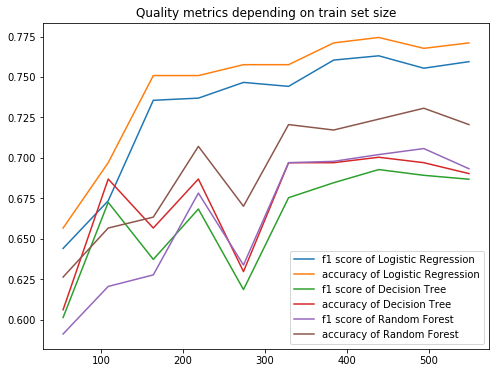

In [25]:
plt.figure(figsize=(8, 6))

plt.plot(*zip(*logreg_f1_score.items()), label='f1 score of Logistic Regression')
plt.plot(*zip(*logreg_accuracy.items()), label='accuracy of Logistic Regression')
plt.plot(*zip(*tree_f1_score.items()), label='f1 score of Decision Tree')
plt.plot(*zip(*tree_accuracy.items()), label='accuracy of Decision Tree')
plt.plot(*zip(*forest_f1_score.items()), label='f1 score of Random Forest')
plt.plot(*zip(*forest_accuracy.items()), label='accuracy of Random Forest')
plt.legend(loc='lower right')
plt.title('Quality metrics depending on train set size')

Summary of final plot:
- the best quality of classification is achieved with Logistic Regression model
- increasement of train set leads to better quality of classification